In [1]:
from shapely.geometry import Point, GeometryCollection, MultiPolygon, Polygon
from model.RegionsCalcs import create_regions, create_base_region_for_bs
from model.RegionsPlotter import standard_plot
import numpy as np
from model.NetworkGraph import CompleteGraph
from model.NodeClass import Node
from model.LinkClass import Link
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot
from numpy import random

In [2]:
# Import the network
graph = CompleteGraph.of_sources("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [3]:
# Common scenario for both cases
# Params
scaling_factor = 1  # No scaling
p_tx_macro = 40     # W
p_tx_fem = 10       # W
alpha_loss = 4      # dB
def_max_rad = 500   # meters
prob_fem = 1


cells = []
cells_max_radius = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL5":
        assocciated_nodes.append(node)


assocciated_nodes = sorted(assocciated_nodes, key=lambda x: x.type == "HL4", reverse=True)
for node in assocciated_nodes:
    if node.type == "HL4":
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_macro))
    else:
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_fem))
        cells_max_radius.append(def_max_rad)


base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

[(0.0, 0.0), (0.0, 98.53143101823554), (95.58191009784183, 98.53143101823554), (95.58191009784183, 0.0), (0.0, 0.0)]


In [4]:
regions = []

for cell in cells:
    regions.append(create_base_region_for_bs(cell[:2], cell[2], alpha_loss, def_max_rad, scaling_factor))


In [5]:
regions

[<POLYGON ((28.947 96.531, 28.944 96.476, 28.936 96.422, 28.922 96.368, 28.90...>,
 <POLYGON ((46.538 48.744, 46.536 48.689, 46.528 48.634, 46.514 48.581, 46.49...>,
 <POLYGON ((70.975 39.012, 70.972 38.956, 70.964 38.902, 70.95 38.848, 70.932...>,
 <POLYGON ((32.498 27.232, 32.496 27.177, 32.487 27.122, 32.474 27.068, 32.45...>,
 <POLYGON ((63.8 46.002, 63.797 45.947, 63.789 45.893, 63.776 45.839, 63.757 ...>,
 <POLYGON ((41.467 36.116, 41.465 36.061, 41.456 36.006, 41.443 35.952, 41.42...>,
 <POLYGON ((64.386 63.459, 64.383 63.404, 64.375 63.349, 64.362 63.296, 64.34...>,
 <POLYGON ((49.681 26.102, 49.679 26.047, 49.671 25.992, 49.657 25.939, 49.63...>,
 <POLYGON ((72.944 61.242, 72.941 61.187, 72.933 61.132, 72.919 61.079, 72.90...>,
 <POLYGON ((68.341 51.433, 68.338 51.378, 68.33 51.323, 68.317 51.269, 68.298...>,
 <POLYGON ((80.051 62.446, 80.048 62.391, 80.04 62.336, 80.026 62.283, 80.008...>,
 <POLYGON ((25.575 17.485, 25.572 17.43, 25.564 17.375, 25.55 17.322, 25.532 ...>,
 <PO

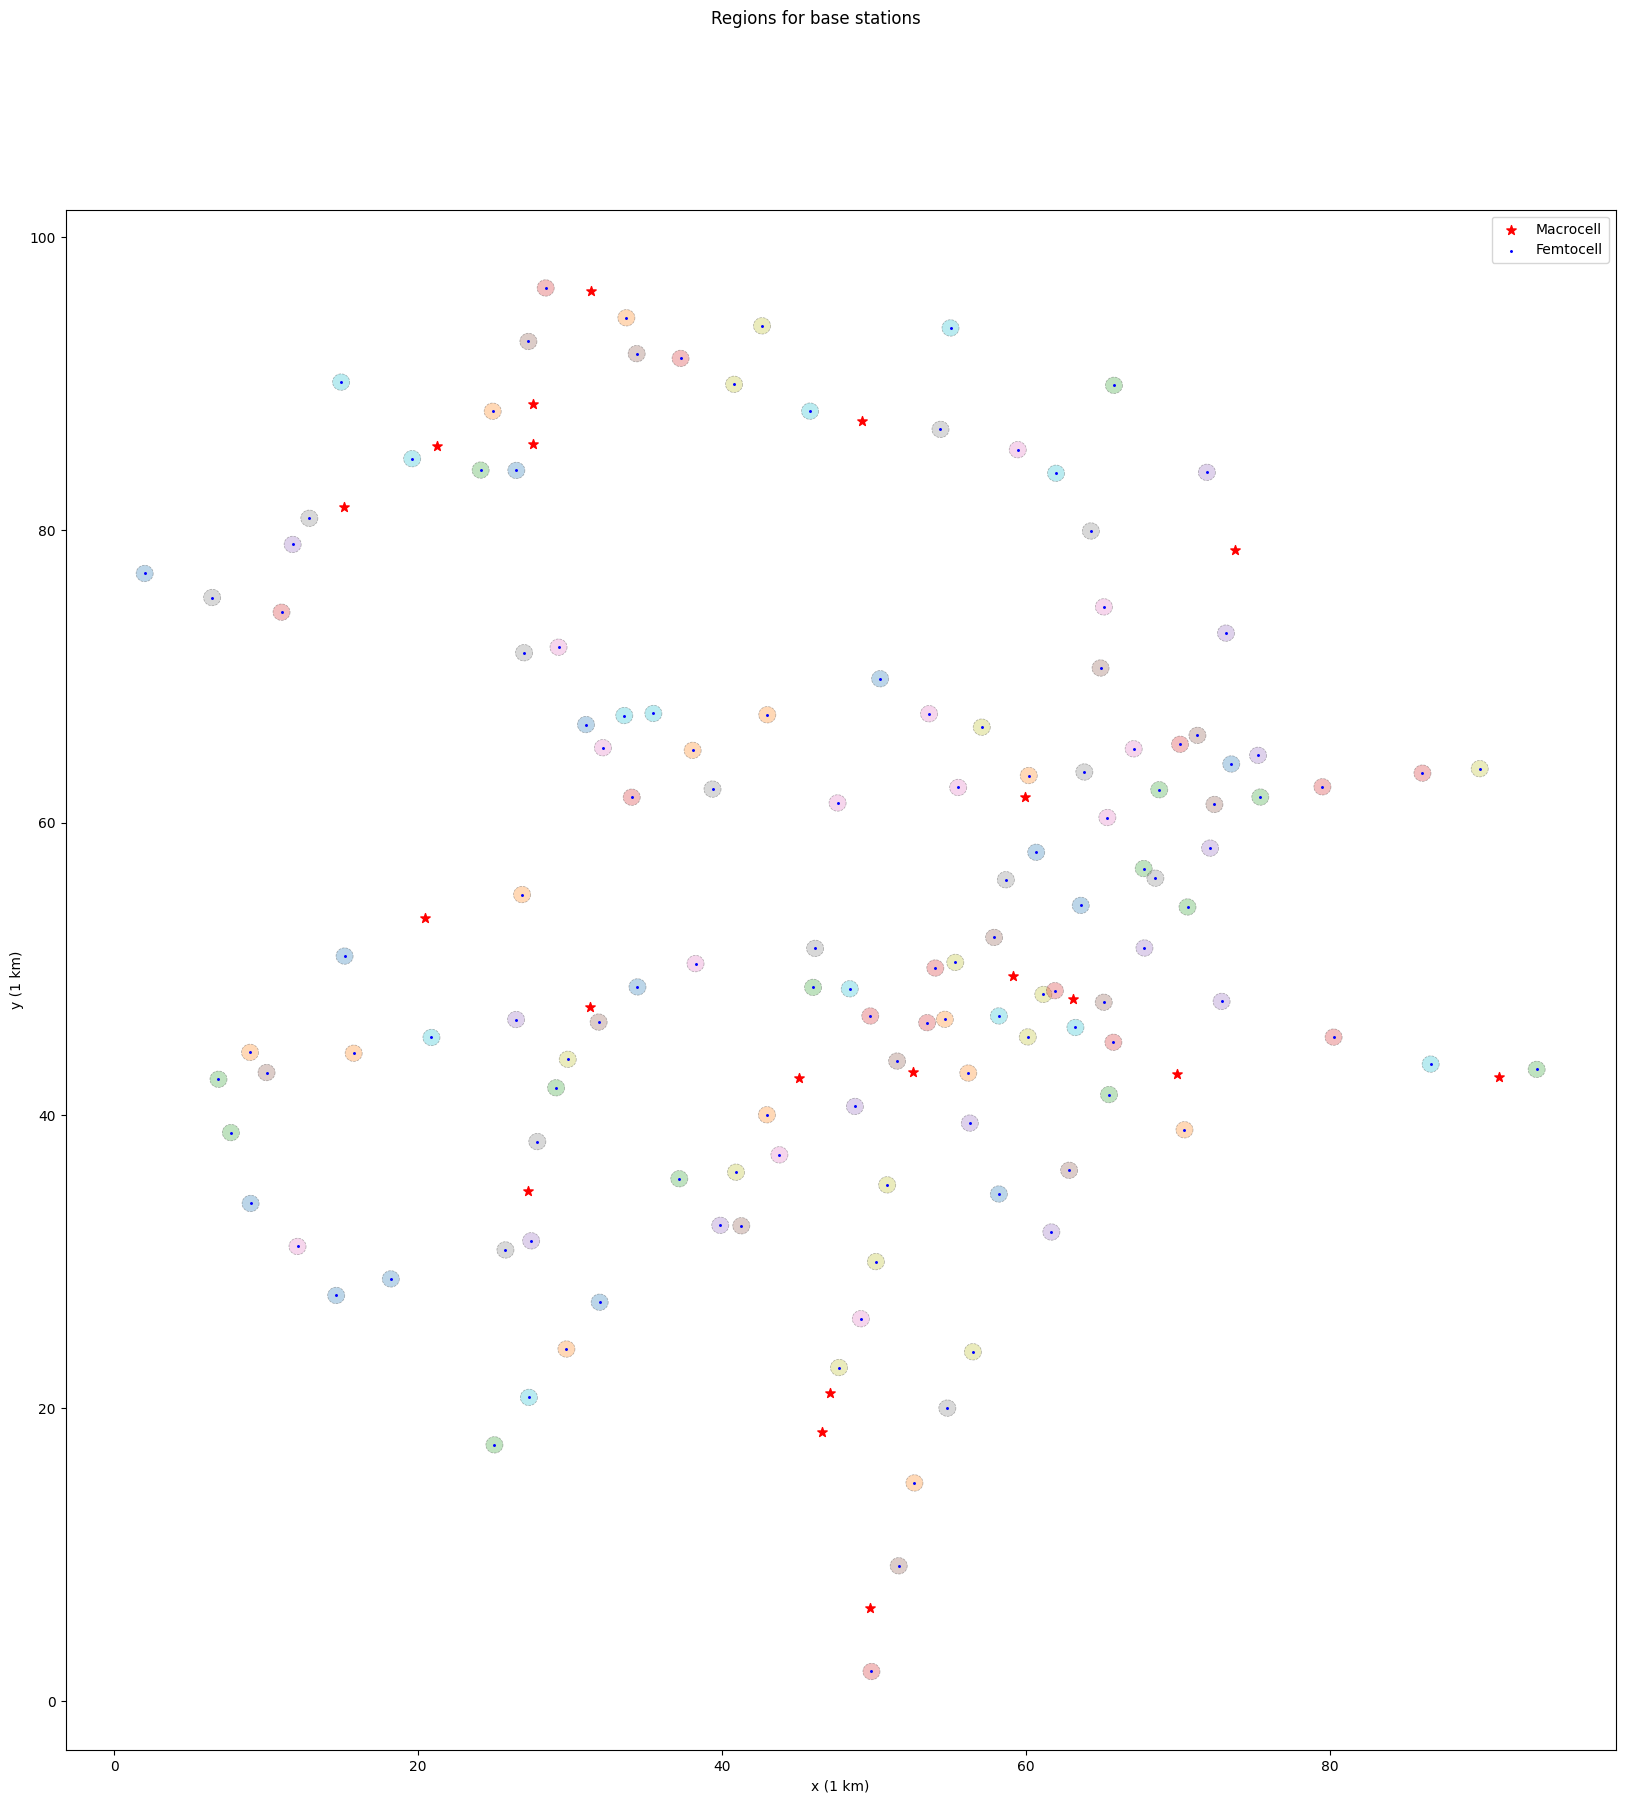

In [6]:
standard_plot(
    regions, 
    graph.nodes, 
    1, 
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for base stations", "figsize": (20, 20)},
)